In [57]:
import numpy as np

import pandas as pd

import seaborn as sns
sns.set()

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from feature_engine.outliers import OutlierTrimmer
from feature_engine.imputation.mean_median import MeanMedianImputer

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors

In [58]:
data = pd.read_csv('credit_card_seg.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [59]:
# Drop redundant features

data = data.drop(['CUST_ID'], axis=1)

In [60]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [61]:
# Calculate percentage of null data per feature
vars_na = [var for var in data.columns if data[var].isnull().mean() > 0]
data_na = data[vars_na].isnull().mean() * 100
data_na

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

In [62]:
# Proceed with mean data imputation for null data

In [63]:
mean_imputer = MeanMedianImputer(imputation_method='mean',
                                       variables=['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])
mean_imputer.fit(data)
data_imputed = mean_imputer.transform(data)

In [64]:
# Check distribution of imputed data against original

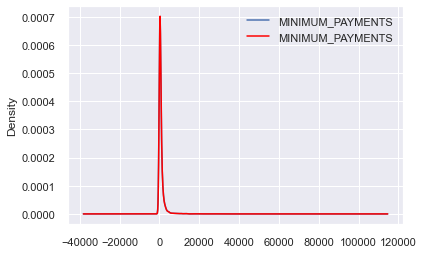

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['MINIMUM_PAYMENTS'].plot(kind='kde', ax=ax)
data_imputed['MINIMUM_PAYMENTS'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [66]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16,4))

  plt.subplot(1,3,1)
  sns.histplot(df[variable], bins=30, kde=True)
  plt.title(f'Histogram - {variable}')

  plt.subplot(1,3,2)
  stats.probplot(df[variable], dist='norm', plot=plt)
  plt.ylabel('RM Quantiles')
  plt.title(f'Q-Q Plot - {variable}')

  plt.subplot(1,3,3)
  sns.boxplot(y=df[variable])
  plt.title(f'Boxplot - {variable}')

  plt.show()

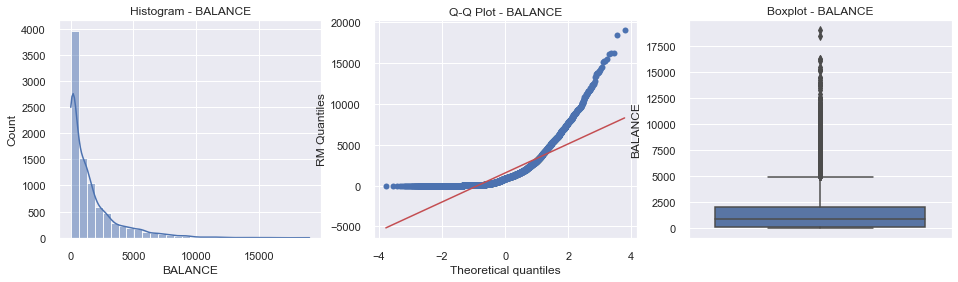

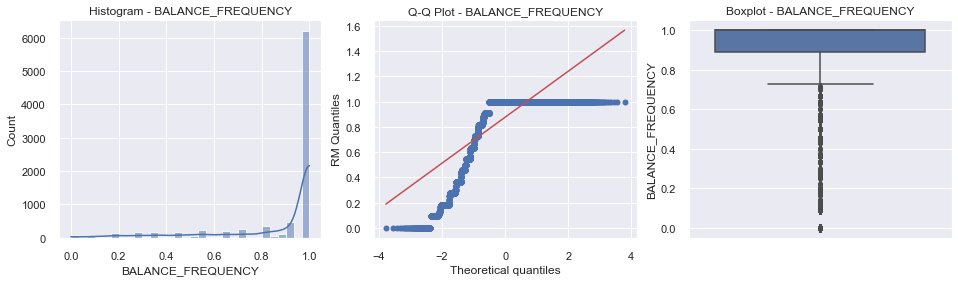

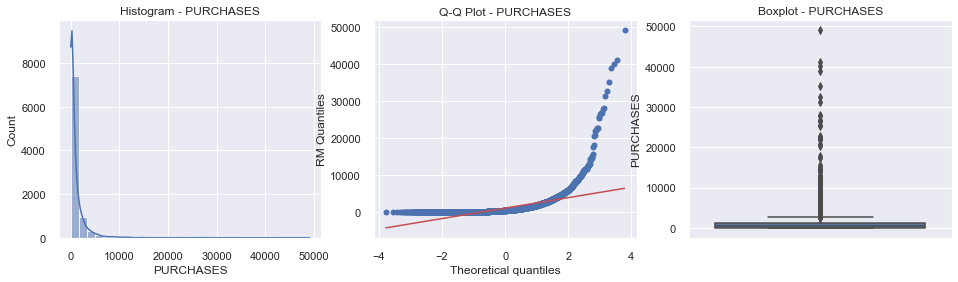

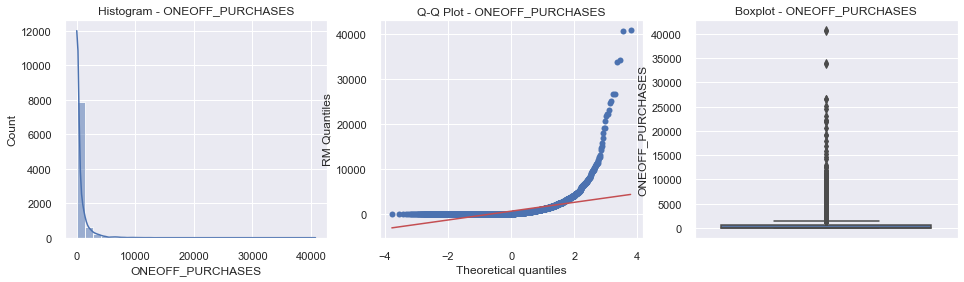

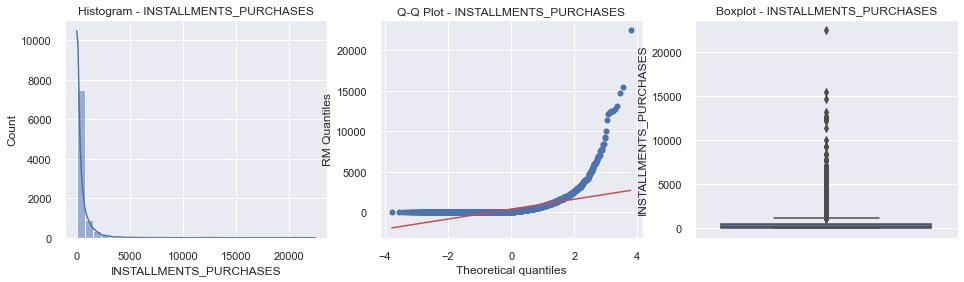

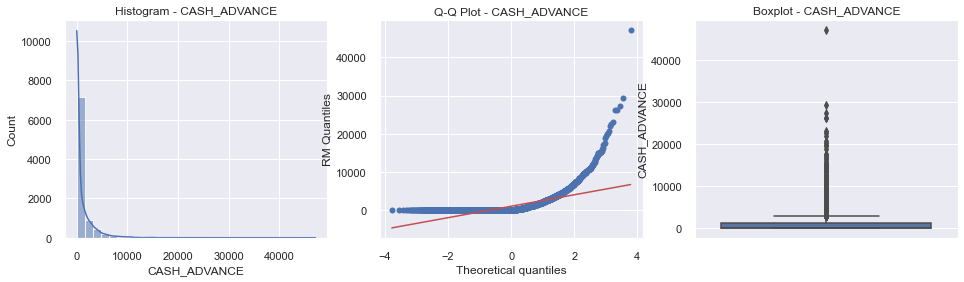

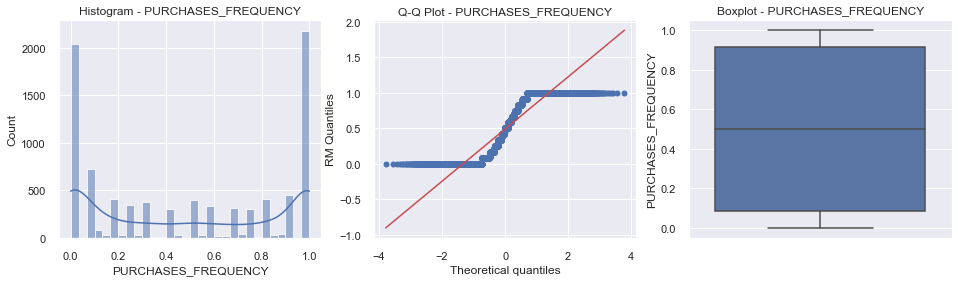

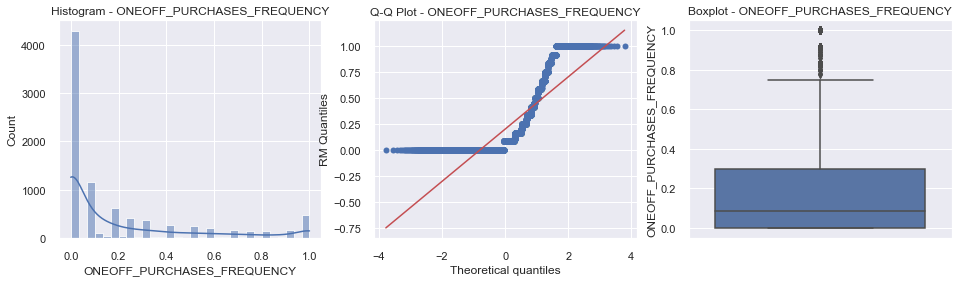

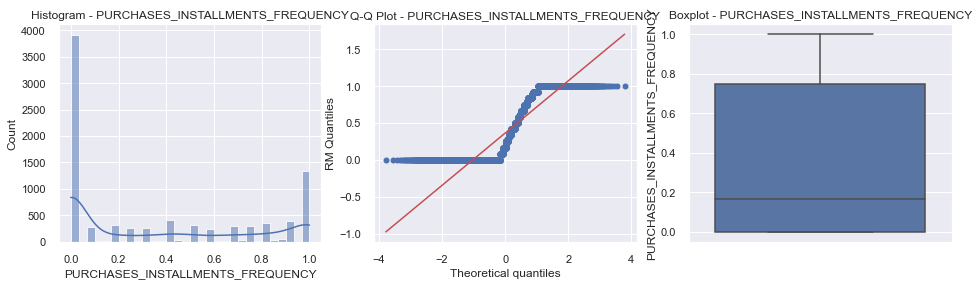

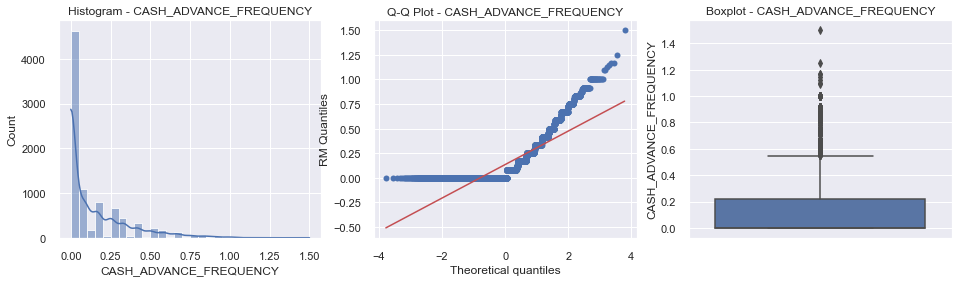

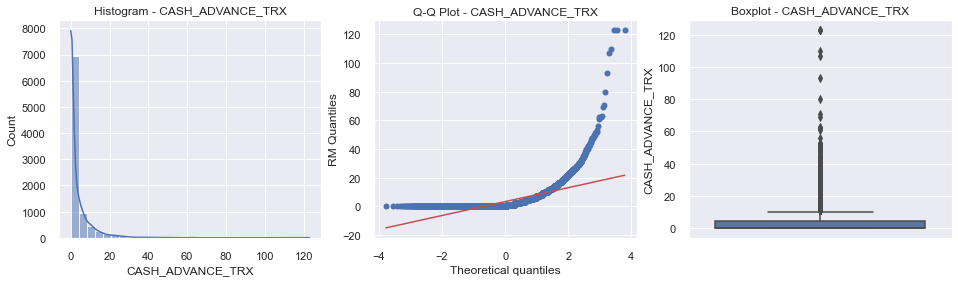

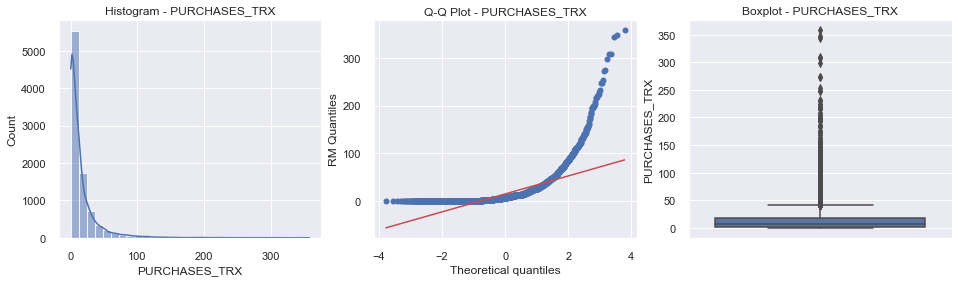

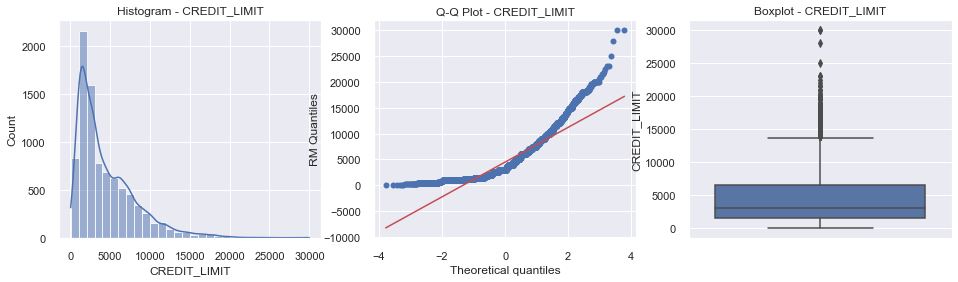

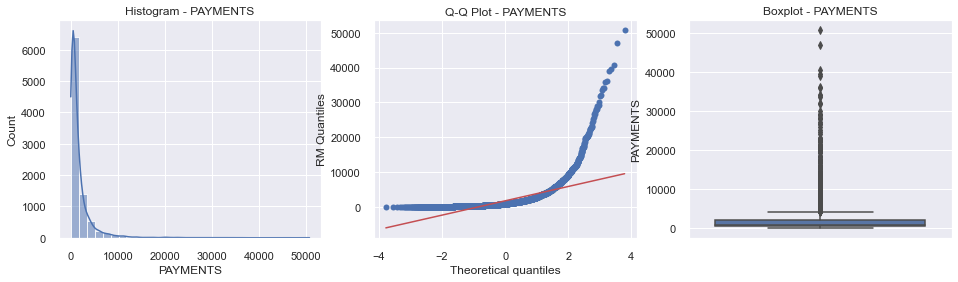

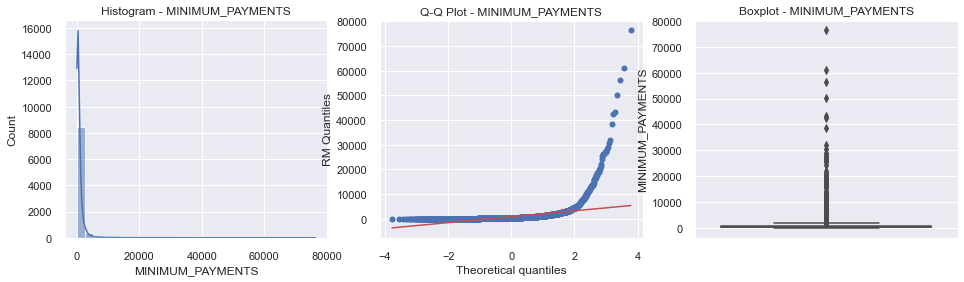

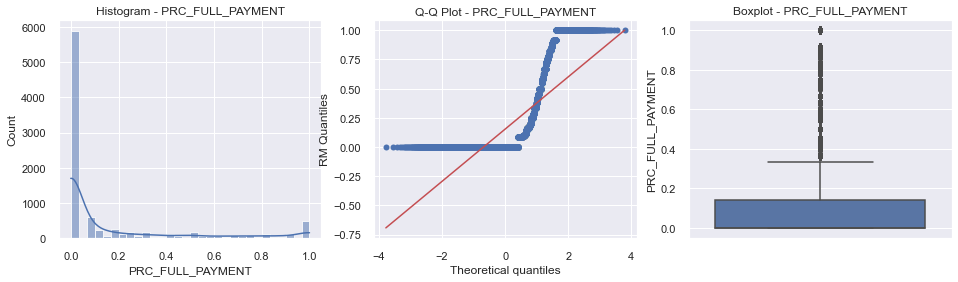

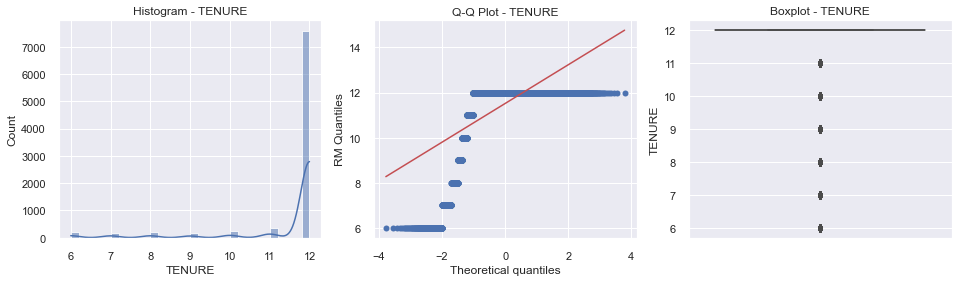

In [67]:
# Run diagnostic plots to explore distributions and outliers in suspected features

for i in range(data_imputed.shape[1]):
  diagnostic_plots(data_imputed, data_imputed.columns[i]) 

In [56]:
# Apply Trimmer

from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method = 'iqr',
                        tail='both',
                        fold=1.5,
                        variables=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                  'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'])
windsoriser.fit(data_imputed)
data_trimmed = windsoriser.transform(data_imputed)

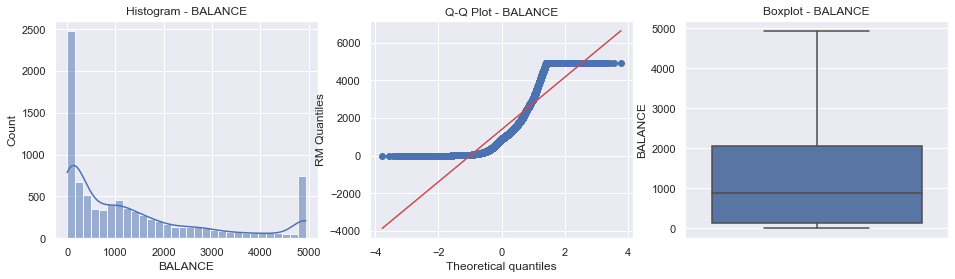

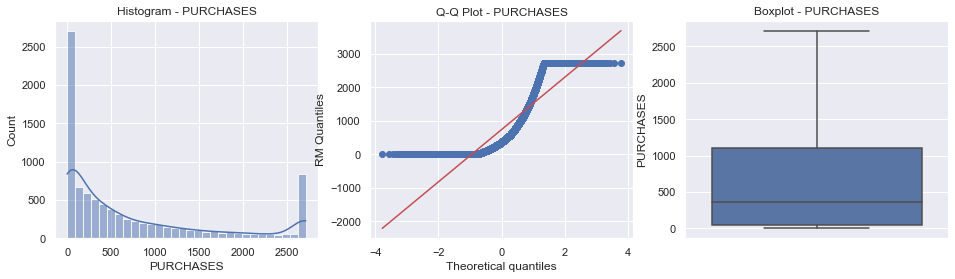

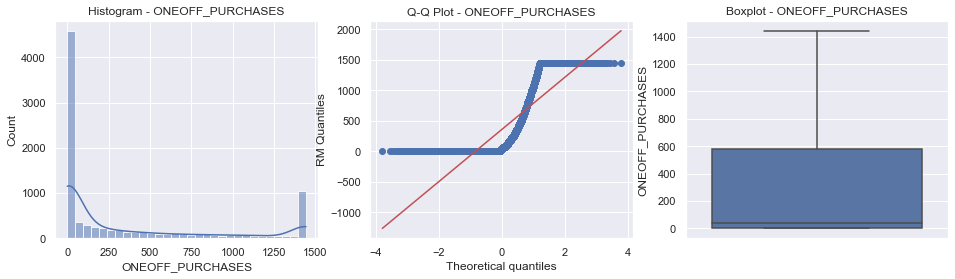

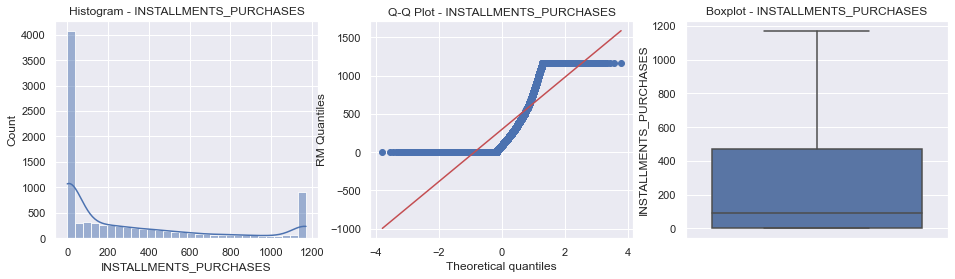

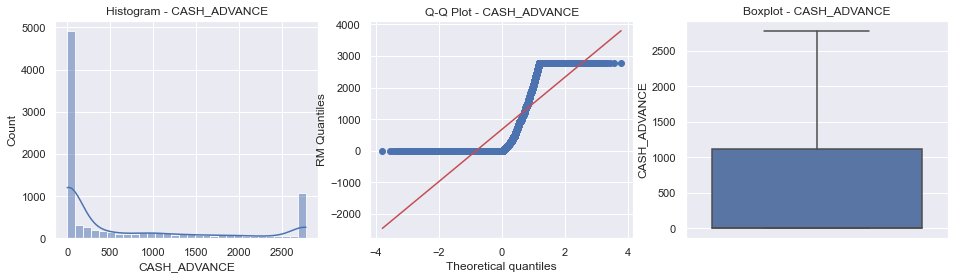

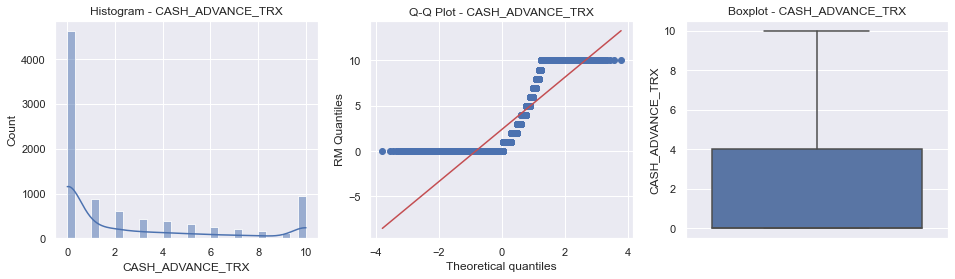

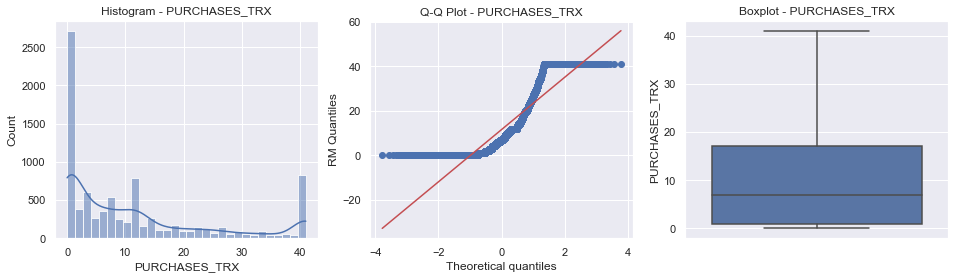

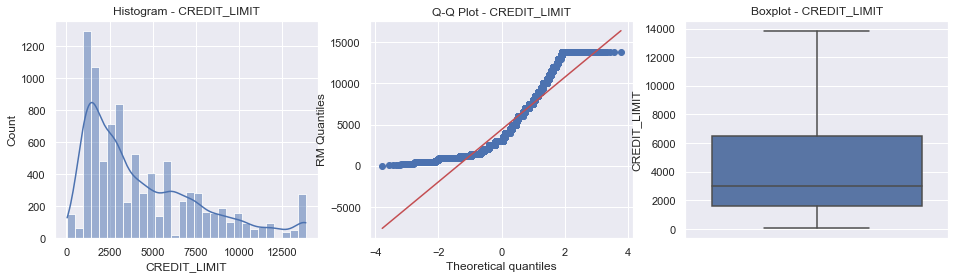

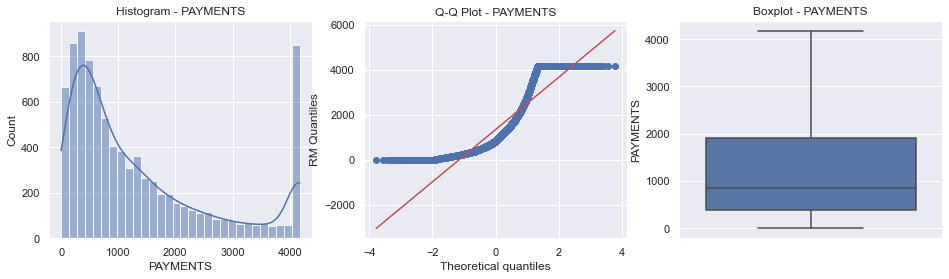

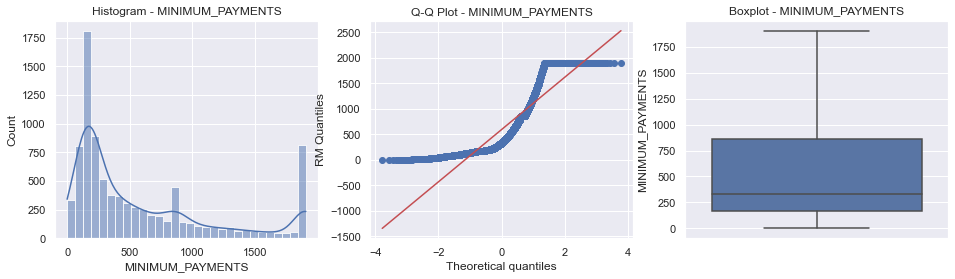

In [13]:
# Re-run diagnostic plots to evaluate performance of trimmer

diagnostic_plots(data_trimmed, 'BALANCE')
diagnostic_plots(data_trimmed, 'PURCHASES')
diagnostic_plots(data_trimmed, 'ONEOFF_PURCHASES')
diagnostic_plots(data_trimmed, 'INSTALLMENTS_PURCHASES')
diagnostic_plots(data_trimmed, 'CASH_ADVANCE')
diagnostic_plots(data_trimmed, 'CASH_ADVANCE_TRX')
diagnostic_plots(data_trimmed, 'PURCHASES_TRX')
diagnostic_plots(data_trimmed, 'CREDIT_LIMIT')
diagnostic_plots(data_trimmed, 'PAYMENTS')
diagnostic_plots(data_trimmed, 'MINIMUM_PAYMENTS')

In [68]:
# Standardise scales

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_imputed)
scaled_data = pd.DataFrame(scaled_data, columns=data_imputed.columns)

In [69]:
# Given feature space to apply PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns = (["col_1", "col_2", "col_3", "col_4", "col_5", "col_6"]))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,8950.0,1.270244e-17,2.154025,-2.764630,-1.486011,-0.455433,0.765431,29.605617
col_2,8950.0,-5.080976e-17,1.857882,-2.680366,-1.258440,-0.484985,0.736940,25.383843
col_3,8950.0,-9.526830e-18,1.222622,-9.478647,-0.777589,0.052662,0.562792,16.946062
col_4,8950.0,2.540488e-17,1.127714,-11.045449,-0.620247,0.140003,0.695618,14.343733
col_5,8950.0,-3.493171e-17,1.031888,-2.657597,-0.537413,-0.083889,0.523931,17.640640
col_6,8950.0,-6.351220e-18,0.988759,-6.379422,-0.488621,-0.087362,0.184417,9.862821


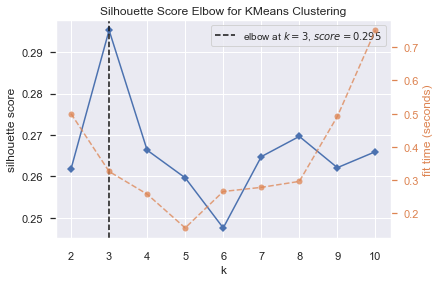

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [71]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k = 10, metric = 'silhouette')
Elbow_M.fit(pca_data)
Elbow_M.show()

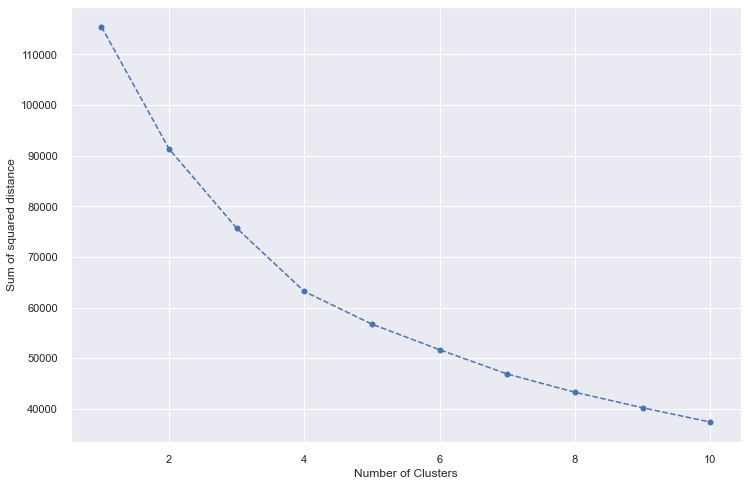

In [72]:
results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_data) 
    results[i] = kmeans_pca.inertia_
    
plt.figure(figsize=(12, 8))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [77]:
KM = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0)
Y_KM = KM.fit_predict(pca_data)

In [76]:
print(f"The silhouette score for the current model is: {silhouette_score(pca_data, Y_KM)}")

The silhouette score for the current model is: 0.2667383219511157


In [78]:
neighbors = NearestNeighbors(n_neighbors = 2) 
nbrs = neighbors.fit(pca_data) 
distances, indices = nbrs.kneighbors(pca_data) 

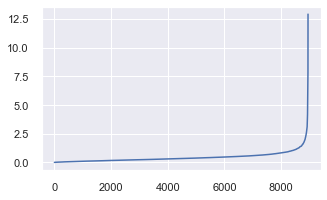

In [79]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show()

In [80]:
dbscan = DBSCAN(eps = 2, min_samples = 20).fit(pca_data) 
Y_DB = dbscan.labels_

In [81]:
print(f"The silhouette score for the current model is: {silhouette_score(pca_data, Y_DB)}")

The silhouette score for the current model is: 0.611446680806761


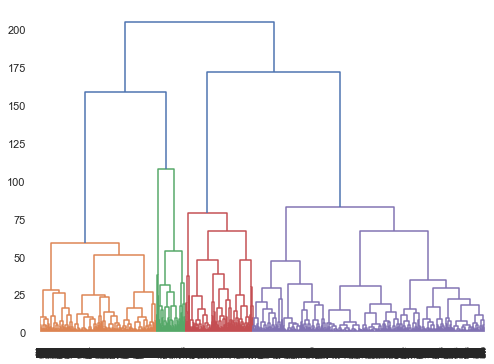

In [30]:
clusters = hierarchy.linkage(pca_data, method="ward")
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [31]:
clustering_model = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
clustering_model.fit(pca_data)
Y_AG = clustering_model.labels_

In [32]:
print(f"The silhouette score for the current model is: {silhouette_score(pca_data, Y_AG)}")

The silhouette score for the current model is: 0.29063079924683966


In [82]:
pca_data["Clusters"] = Y_DB
data_imputed["Clusters"] = Y_DB

In [83]:
data_imputed.groupby('Clusters').count()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Clusters,,,,,,,,,,,,,,,,,
-1,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265,265
0,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685,8685


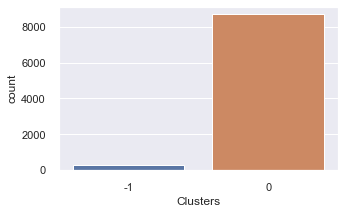

In [84]:
count_plot = sns.countplot(x = data_imputed["Clusters"])
plt.show()

In [85]:
data_imputed.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Clusters'],
      dtype='object')

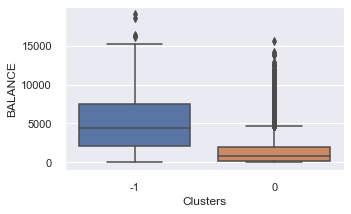

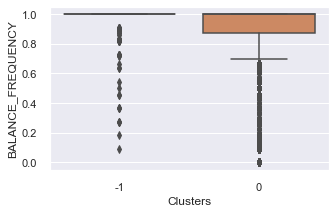

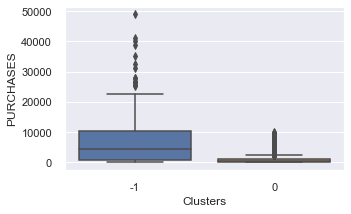

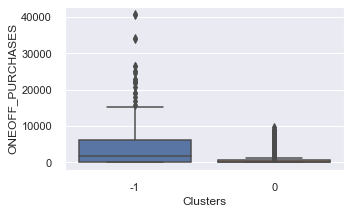

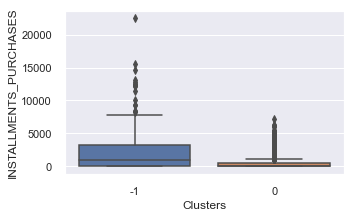

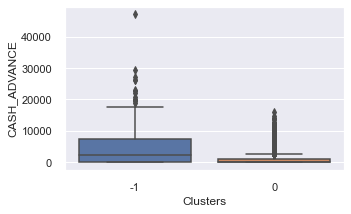

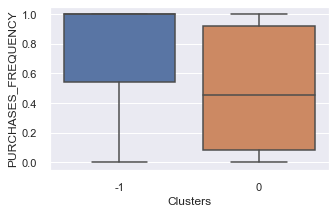

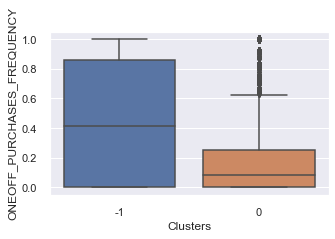

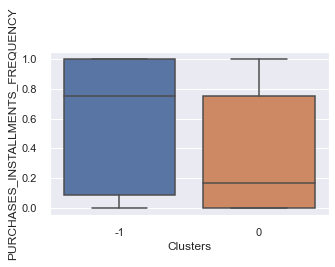

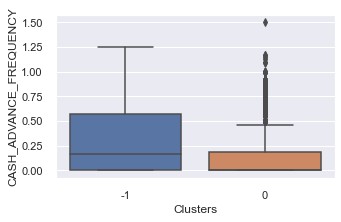

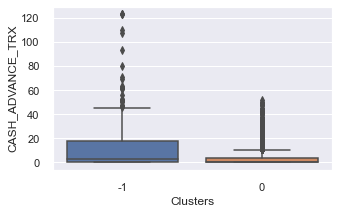

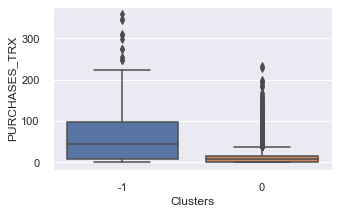

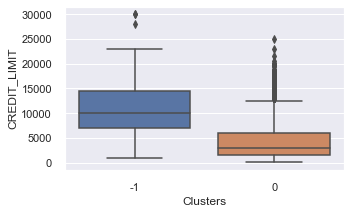

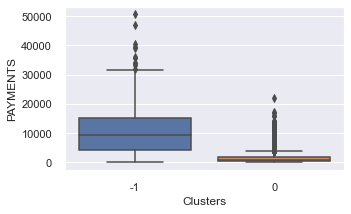

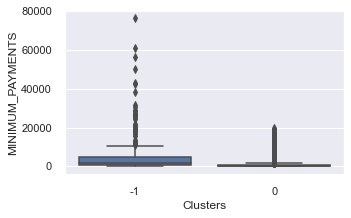

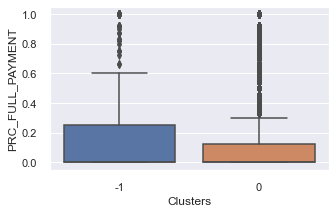

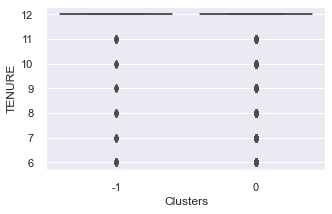

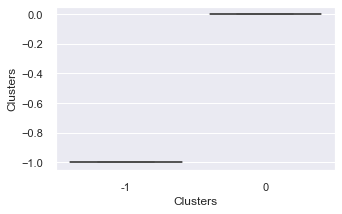

In [86]:
features = data_imputed.columns
for feature in features:
    plt.figure()
    sns.boxplot(y = data_imputed[feature], x = data_imputed["Clusters"])
    plt.show()

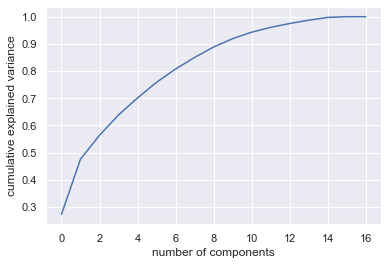

In [17]:
pca = PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
# To consider between 4 PCs

In [20]:
pca = PCA(n_components=4)
pca.fit(scaled_data)

df_pca_components = pd.DataFrame(
    data=pca.components_.round(6),
    columns=data_imputed.columns.values,
    index=['component 1', 'component 2', 'component 3', 'component 4'])

df_pca_components

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
component 1,0.101077,0.120043,0.411642,0.346407,0.336814,-0.023343,0.321493,0.294633,0.274710,-0.089139,-0.048654,0.390695,0.211663,0.266249,0.060351,0.132112,0.081021
component 2,0.403957,0.130537,0.041038,0.062872,-0.018533,0.439242,-0.190780,-0.017924,-0.178601,0.434082,0.419734,-0.019394,0.238678,0.257476,0.166969,-0.190025,-0.004326
component 3,-0.160068,-0.420631,0.257904,0.392116,-0.110486,-0.027345,-0.374690,0.115132,-0.473411,-0.109084,-0.115531,-0.077335,0.100479,0.276234,-0.221637,0.124775,-0.064326
component 4,0.283447,0.149743,0.039110,0.078154,-0.051132,-0.254586,-0.188976,0.027463,-0.215001,-0.264218,-0.326932,-0.018105,0.131655,-0.114765,0.402911,-0.424427,0.435286


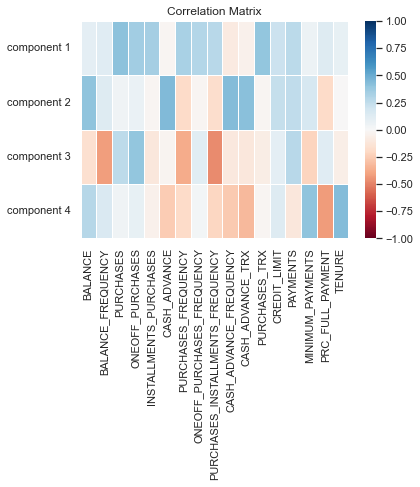

In [41]:
s = sns.heatmap(
    df_pca_components,
    vmin=-1,
    vmax=1,
    linewidths=1,
    cmap='RdBu'
)
plt.title('Correlation Matrix')
plt.show()

In [42]:
pca_scores = pca.transform(scaled_data)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores) 
    results[i] = kmeans_pca.inertia_

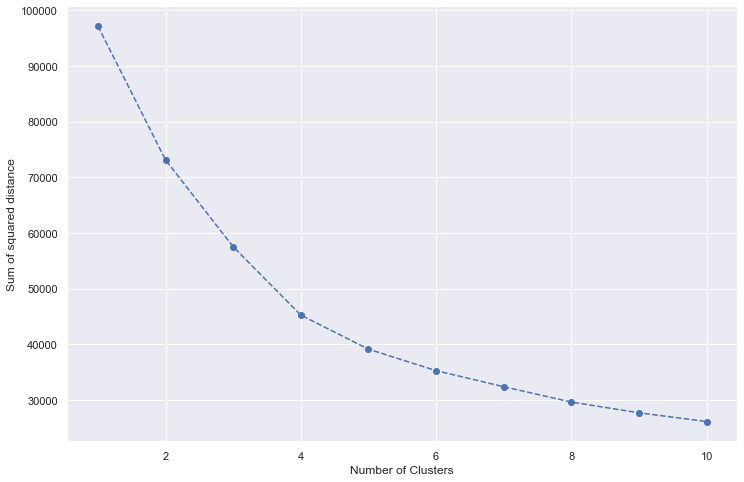

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

In [44]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [45]:
pca_scores

array([[-1.68222027, -1.07645068,  0.4884981 ,  0.66555082],
       [-1.13829491,  2.50647661,  0.60120587, -0.12043801],
       [ 0.96968401, -0.38352033,  0.10236756,  1.20926577],
       ...,
       [-0.92620365, -1.81078567, -0.47473151, -2.28024021],
       [-2.33655167, -0.65796602,  0.97472523, -1.8612786 ],
       [-0.55642214, -0.40046694,  1.01521854, -1.9532346 ]])

In [47]:
df_segm_pca = pd.concat([data_imputed.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
df_segm_pca.columns.values[-4:] = ['component 1', 'component 2', 'component 3', 'component 4']
df_segm_pca['K-means PCA'] = kmeans_pca.labels_

In [48]:
df_segm_pca_analysis = df_segm_pca.groupby(['K-means PCA']).mean().round(4)
df_segm_pca_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,component 1,component 2,component 3,component 4
K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,1018.0348,0.7895,280.8907,222.0974,58.9921,570.0580,0.1775,0.0936,0.0810,0.1099,...,3.0620,3356.5146,964.8169,585.8036,0.0799,11.4730,-1.3113,-0.2142,0.6224,0.3341
1,869.5820,0.9346,1184.6488,536.7034,648.3126,203.7668,0.8875,0.2812,0.7238,0.0423,...,21.8212,4043.7755,1270.2942,654.9088,0.2665,11.5720,0.9107,-1.1418,-0.7480,-0.2958
2,3332.9143,0.9848,7066.1829,4754.0086,2313.4063,707.9533,0.9460,0.7457,0.7671,0.0773,...,82.0390,9686.3450,6882.5951,1766.6864,0.3037,11.9466,6.0530,0.6705,0.8965,0.2995
3,4469.8750,0.9675,462.2405,291.2296,171.0935,4458.0001,0.2735,0.1320,0.1733,0.4849,...,6.9797,7314.4752,3405.2780,1961.4333,0.0352,11.3463,-0.5565,3.4450,-0.3940,-0.4189


component 1: transactions
component 2: borrowing with min repayments
component 3: one-off purchases 
component 4: tenure and min repayment

seg 1: frugals; seg 2: standard; seg 3: spenders; seg 4: borrowers  

In [49]:
df_segm_pca_analysis['Count'] =  df_segm_pca.groupby('K-means PCA')['K-means PCA'].transform('count')
df_segm_pca_analysis.rename(index={
    0: 'frugals',
    1: 'standard',
    2: 'spenders',
    3: 'borrowers'
}, inplace=True)

df_segm_pca_analysis

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,component 1,component 2,component 3,component 4,Count
K-means PCA,,,,,,,,,,,,,,,,,,,,,
frugals,1018.0348,0.7895,280.8907,222.0974,58.9921,570.0580,0.1775,0.0936,0.0810,0.1099,...,3356.5146,964.8169,585.8036,0.0799,11.4730,-1.3113,-0.2142,0.6224,0.3341,3983
standard,869.5820,0.9346,1184.6488,536.7034,648.3126,203.7668,0.8875,0.2812,0.7238,0.0423,...,4043.7755,1270.2942,654.9088,0.2665,11.5720,0.9107,-1.1418,-0.7480,-0.2958,1230
spenders,3332.9143,0.9848,7066.1829,4754.0086,2313.4063,707.9533,0.9460,0.7457,0.7671,0.0773,...,9686.3450,6882.5951,1766.6864,0.3037,11.9466,6.0530,0.6705,0.8965,0.2995,3250
borrowers,4469.8750,0.9675,462.2405,291.2296,171.0935,4458.0001,0.2735,0.1320,0.1733,0.4849,...,7314.4752,3405.2780,1961.4333,0.0352,11.3463,-0.5565,3.4450,-0.3940,-0.4189,3983


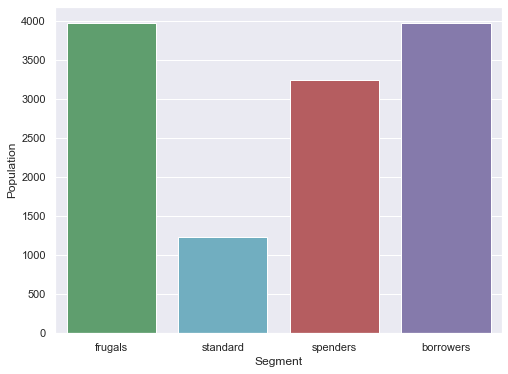

In [50]:
plt.figure(figsize=(8, 6))
s = sns.barplot(data=df_segm_pca_analysis, x=df_segm_pca_analysis.index, y='Count', palette=['g','c','r','m'])
plt.xlabel('Segment')
plt.ylabel('Population')
plt.show()

In [51]:
df_segm_pca['K-means PCA'] = df_segm_pca['K-means PCA'].map({
    0: 'frugals',
    1: 'standard',
    2: 'spenders',
    3: 'borrowers'
})
df_segm_pca

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,component 1,component 2,component 3,component 4,K-means PCA
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,1000.0,201.802084,139.509787,0.000000,12,-1.682220,-1.076451,0.488498,0.665551,frugals
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,7000.0,4103.032597,1072.340217,0.222222,12,-1.138295,2.506477,0.601206,-0.120438,borrowers
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,0.969684,-0.383520,0.102368,1.209266,standard
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,7500.0,0.000000,864.206542,0.000000,12,-0.873628,0.043166,1.460158,1.151979,frugals
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,-1.599434,-0.688581,0.365085,0.990231,frugals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,325.594462,48.886365,0.500000,6,-0.359629,-2.016145,-0.995363,-2.727434,standard
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,1000.0,275.861322,864.206542,0.000000,6,-0.564369,-1.639123,-1.290246,-1.860552,standard
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,1000.0,81.270775,82.418369,0.250000,6,-0.926204,-1.810786,-0.474732,-2.280240,standard
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,500.0,52.549959,55.755628,0.250000,6,-2.336552,-0.657966,0.974725,-1.861279,frugals


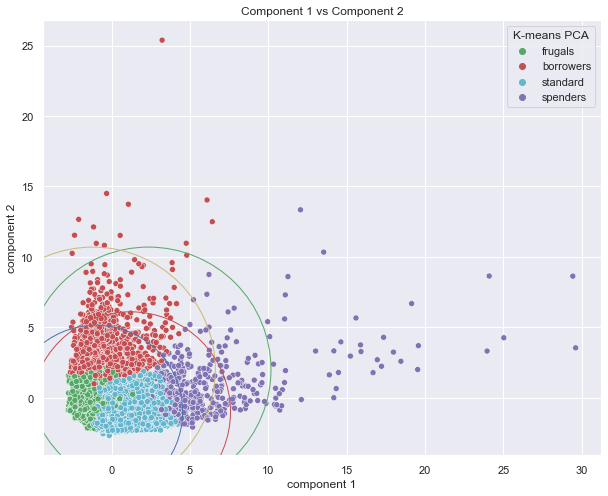

In [54]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
 x=df_segm_pca['component 1'],
 y=df_segm_pca['component 2'],
 hue=df_segm_pca['K-means PCA'],
 palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 2')
plt.show()

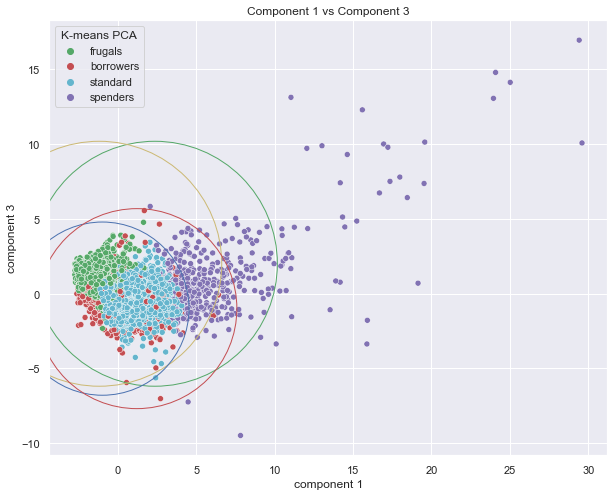

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 3'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 3')
plt.show()

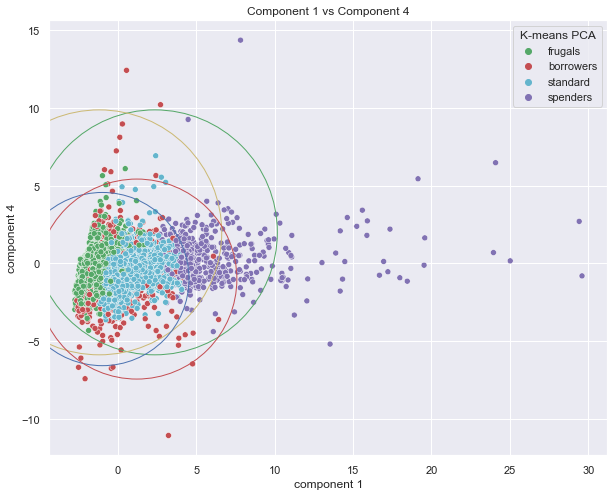

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 4'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 1 vs Component 4')
plt.show()

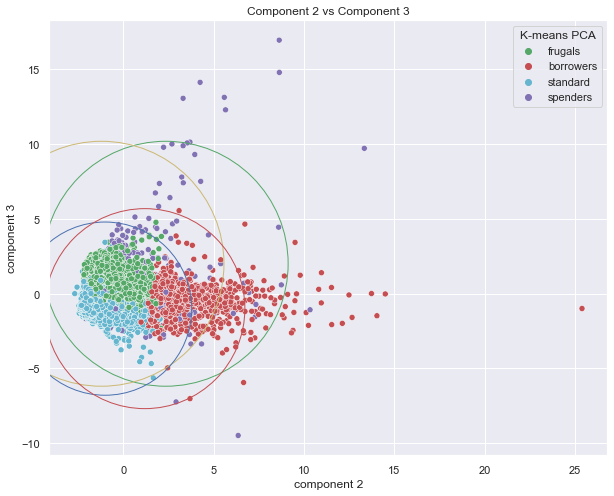

In [57]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 2'],
    y=df_segm_pca['component 3'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 2 vs Component 3')
plt.show()

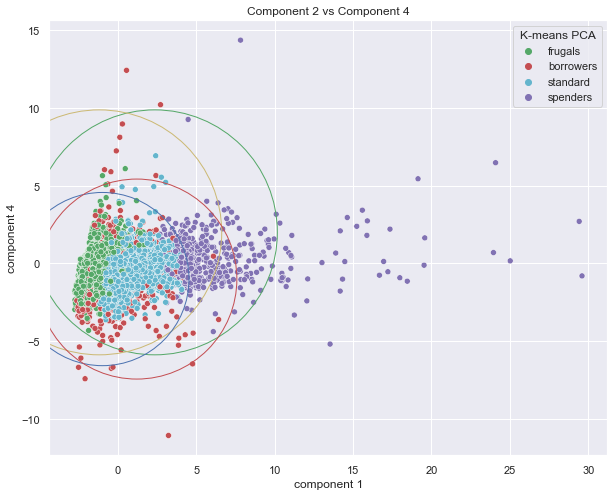

In [58]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 4'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 2 vs Component 4')
plt.show()

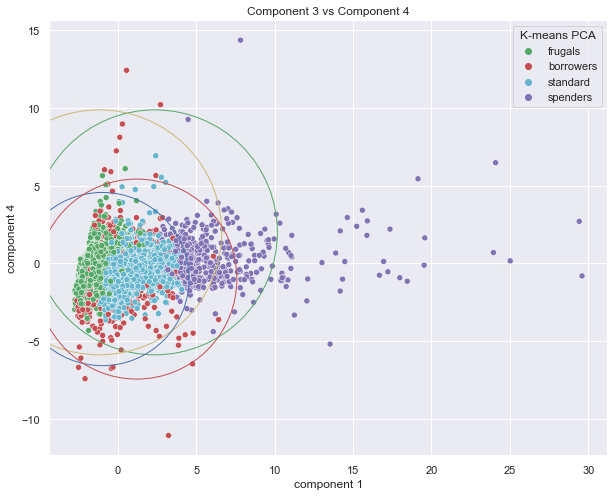

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 4'],
    hue=df_segm_pca['K-means PCA'],
    palette=['g','r','c','m']
)
plt.scatter(2.35, 2 , s=60000, facecolors='none', edgecolors='g' )
plt.scatter(-1.2, 2 , s=60000, facecolors='none', edgecolors='y' )
plt.scatter(-1, -1 , s=30000, facecolors='none', edgecolors='b' )
plt.scatter(1.2, -1 , s=40000, facecolors='none', edgecolors='r' )

plt.title('Component 3 vs Component 4')
plt.show()

In [60]:
# Plots suggest only PC 1 (transactions) and 2 (borrowing with min repayment) capable of discriminating between the identified customer segments